In [2]:
from typing import List, Union, Dict, Optional, Tuple
from datetime import datetime
from os.path import join as pjoin

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import pandas_profiling

In [3]:
DATA_PATH = 'data'

In [4]:
train = pd.read_csv(pjoin(DATA_PATH, 'train.csv'))
test = pd.read_csv(pjoin(DATA_PATH, 'test.csv'))

In [5]:
renamings = {
    'Дата рейса': 'date',
    'Рейс': 'flight',
    'А/П отправл': 'from',
    'А/П прибыт': 'to',
    'Номер ВС': 'aircraft',
    'Время отправления по расписанию': 'departure_scheduled',
    'Время отправления фактическое': 'departure_actual',
    'Время прибытия по расписанию': 'arrival_scheduled',
    'Время прибытия фактическое': 'arrival_actual',
    '1 КЗ Код': 'delay_code',
    'Задержка отправления в минутах': 'delay',
}

train.rename(columns=renamings, inplace=True)
test.rename(columns=renamings, inplace=True)

In [6]:
dtypes = {
    'flight': str,
    'aircraft': str,
    'date': 'datetime64[ns]',
    'departure_scheduled': 'datetime64[ns]',
    'arrival_scheduled': 'datetime64[ns]',
}
test = test.astype(dtypes)

dtypes.update({
    'departure_actual': 'datetime64[ns]',
    'arrival_actual': 'datetime64[ns]',
})
train = train.astype(dtypes)


# Get basic data info

In [7]:
train.shape, test.shape

((472859, 11), (202654, 8))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472859 entries, 0 to 472858
Data columns (total 11 columns):
date                   472859 non-null datetime64[ns]
flight                 472859 non-null object
from                   472859 non-null object
to                     472859 non-null object
aircraft               472859 non-null object
departure_scheduled    472859 non-null datetime64[ns]
departure_actual       472859 non-null datetime64[ns]
arrival_scheduled      472859 non-null datetime64[ns]
arrival_actual         472644 non-null datetime64[ns]
delay_code             197237 non-null object
delay                  472859 non-null float64
dtypes: datetime64[ns](5), float64(1), object(5)
memory usage: 39.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202654 entries, 0 to 202653
Data columns (total 8 columns):
id                     202654 non-null int64
date                   202654 non-null datetime64[ns]
flight                 202654 non-null object
from                   202654 non-null object
to                     202654 non-null object
aircraft               202654 non-null object
departure_scheduled    202654 non-null datetime64[ns]
arrival_scheduled      202654 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 12.4+ MB


In [10]:
train.head()

,date,flight,from,to,aircraft,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual,delay_code,delay
0,2018-05-23,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 19:44:00,2018-05-23 23:25:00,2018-05-23 23:30:00,NaN,0.0
1,2016-09-06,433,KUF,SVO,131,2016-09-06 09:20:00,2016-09-06 09:17:00,2016-09-06 11:00:00,2016-09-06 11:00:00,NaN,0.0
2,2018-03-03,551,KIV,SVO,163,2018-03-03 02:40:00,2018-03-03 02:27:00,2018-03-03 05:40:00,2018-03-03 05:36:00,NaN,0.0
3,2017-12-10,269,RTW,SVO,15,2017-12-10 12:20:00,2017-12-10 12:17:00,2017-12-10 13:55:00,2017-12-10 13:49:00,NaN,0.0
4,2018-05-13,915,CDG,SVO,207,2018-05-13 00:30:00,2018-05-13 00:26:00,2018-05-13 04:00:00,2018-05-13 04:29:00,NaN,0.0


In [11]:
test.head()

,id,date,flight,from,to,aircraft,departure_scheduled,arrival_scheduled
0,0,2018-03-22,1191,SVO,LED,82,2018-03-22 20:20:00,2018-03-22 21:50:00
1,1,2016-06-23,330,MQF,SVO,19,2016-06-23 04:05:00,2016-06-23 06:20:00
2,2,2016-03-07,372,KJA,SVO,230,2016-03-07 02:45:00,2016-03-07 07:50:00
3,3,2017-08-18,851,SVO,VIE,227,2017-08-18 19:30:00,2017-08-18 22:20:00
4,4,2017-08-10,510,HMA,SVO,29,2017-08-10 07:10:00,2017-08-10 10:20:00


In [12]:
train.describe()

,delay
count,472859.000000
mean,9.916381
std,45.089660
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,1428.000000


In [13]:
train.describe(include='object')

,flight,from,to,aircraft,delay_code
count,472859,472859,472859,472859,197237
unique,1265,177,174,274,404
top,1006,SVO,SVO,263,03.608
freq,848,235922,235659,3528,50071


In [14]:
test.describe(include='object')

,flight,from,to,aircraft
count,202654,202654,202654,202654
unique,1125,163,162,274
top,998,SVO,SVO,257
freq,373,101007,101071,1544


In [15]:
train.describe(include='datetime')

,date,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual
count,472859,472859,472859,472859,472644
unique,1040,237522,402951,241750,406905
top,2018-07-07 00:00:00,2017-07-22 19:00:00,2016-09-26 19:18:00,2018-07-06 17:45:00,2017-04-25 16:45:00
freq,591,8,6,9,6
first,2015-10-27 00:00:00,2015-10-27 07:40:00,2015-10-27 07:36:00,2015-10-27 19:25:00,2015-10-27 19:31:00
last,2018-08-31 00:00:00,2018-08-31 23:55:00,2018-08-31 23:46:00,2018-09-01 07:45:00,2018-09-01 08:04:00


In [16]:
test.describe(include='datetime')

,date,departure_scheduled,arrival_scheduled
count,202654,202654,202654
unique,1040,147511,148736
top,2018-08-23 00:00:00,2018-02-18 15:00:00,2018-04-24 17:45:00
freq,280,6,7
first,2015-10-27 00:00:00,2015-10-27 09:50:00,2015-10-27 16:40:00
last,2018-08-31 00:00:00,2018-08-31 23:55:00,2018-09-01 05:30:00


# Prepare additional data

# Explore data

### Some helpful functions

In [17]:
def get_df_memory_usage_in_mb(df):
    return df.memory_usage(index=True, deep=True).sum() // 2**20

def get_csr_memory_usage_in_mb(csr):
    return (csr.data.nbytes + csr.indptr.nbytes + csr.indices.nbytes) // 2**20

In [18]:
def get_cat_features(X: pd.DataFrame) -> List[str]:
    return X.columns[X.dtypes == 'O'].tolist()

In [19]:
def label_distplots(values, labels, kde=True, hist=True, bins=None):
    for label in labels.unique():
        sns.distplot(values[labels == label], kde=kde, hist=hist, label=f'Label = {label}', norm_hist=True, bins=bins)
    plt.legend();
    
def crosstab_by_mask(df: pd.DataFrame, y: pd.Series, feature: str, mask):
    subset = df[mask]
    subset_y = y[mask]
    return pd.crosstab(subset[feature], y)

In [20]:
def get_figsize():
    return plt.rcParams['figure.figsize'].copy()


def set_figsize(width, height):
    plt.rcParams['figure.figsize'] = width, height

    
class PltResizer:
    def __init__(self, new_size: tuple):
        self._new_size = new_size
        self._old_size = None
        
    def __enter__(self):
        self._old_size = get_figsize()
        set_figsize(*self._new_size)
        
    def __exit__(self, *args):
        set_figsize(*self._old_size)
        
        
def change_figsize(width, height) -> PltResizer:
    return PltResizer((width, height))

## Target

### Distribution

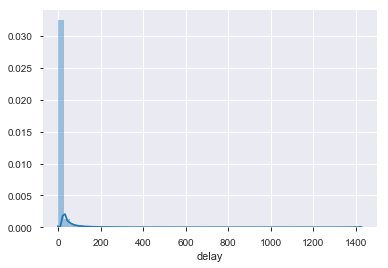

In [21]:
y = train['delay']
sns.distplot(y)

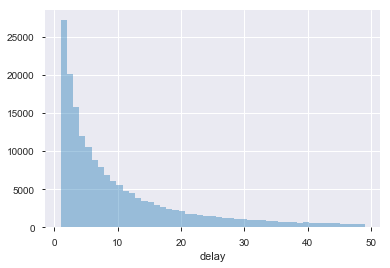

In [22]:
sns.distplot(y[(y > 0) & (y < 50)], kde=False, bins=49)

In [23]:
mins_in_day = 60 * 24
y.max(), mins_in_day  # "delay" always less than one day

(1428.0, 1440)

In [24]:
y.quantile(0.999)

677.1420000000508

### Incorrect delays

In [25]:
real_delay = (train['departure_actual'] - train['departure_scheduled']).dt.total_seconds() // 60
print(real_delay.max())
incorrect_delays = train[real_delay > train['delay']]
print(incorrect_delays.shape)
incorrect_delays.head()

8658.0
(183, 11)


,date,flight,from,to,aircraft,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual,delay_code,delay
2257,2016-07-16,510,ROV,SVO,25,2016-07-16 16:25:00,2016-07-17 20:50:00,2016-07-16 18:20:00,2016-07-17 22:40:00,41,265.0
3566,2017-06-10,514,AAQ,SVO,54,2017-06-10 10:00:00,2017-06-15 11:07:00,2017-06-10 12:05:00,2017-06-15 13:17:00,51,67.0
8803,2015-11-27,516,VOZ,SVO,16,2015-11-27 06:00:00,2015-11-29 02:39:00,2015-11-27 07:05:00,2015-11-29 03:36:00,41,1239.0
10737,2017-04-03,512,CEK,SVO,2,2017-04-03 03:20:00,2017-04-04 23:09:00,2017-04-03 05:45:00,2017-04-05 01:43:00,41,1189.0
12116,2017-12-20,1042,FRA,SVO,233,2017-12-20 19:40:00,2017-12-22 00:30:00,2017-12-20 22:45:00,2017-12-22 03:52:00,41,290.0


In [26]:
# drop such rows
train = train[real_delay <= train['delay']]
train.shape

(472676, 11)

In [27]:
y = train['delay']

### Bin target

In [28]:
y_binned = y.copy()
y_binned[y == 0] = 'zero'
y_binned[y > 0] = 'small'
y_binned[y > 10] = 'medium'
y_binned[y > 60] = 'big'

In [29]:
y_binned.value_counts()

zero      273988
small     120711
medium     62514
big        15463
Name: delay, dtype: int64

## Make full dataset

In [30]:
full = pd.concat([train, test], sort=False)

In [31]:
full.shape

(675330, 12)

In [32]:
get_df_memory_usage_in_mb(train), get_df_memory_usage_in_mb(test)

(153, 52)

## Explore features distribution

### Airports

In [33]:
counts = full['from'].value_counts()
counts

SVO    336926
LED     19426
AER      9071
SIP      7903
SVX      7754
        ...  
SVL         1
BSL         1
PED         1
PLQ         1
TLS         1
Name: from, Length: 179, dtype: int64

In [34]:
counts = full['to'].value_counts()
counts

SVO    336550
LED     19434
AER      9084
SIP      7906
SVX      7764
        ...  
ERZ         1
BSL         1
EIN         1
DME         1
SZG         1
Name: to, Length: 177, dtype: int64

In [35]:
no_svo = full.loc[(full['from'] != 'SVO') & (full['to'] != 'SVO')]
print(no_svo.shape)
no_svo.head()

(1855, 12)


,date,flight,from,to,aircraft,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual,delay_code,delay,id
299,2017-05-21,1139,AER,SIP,28,2017-05-21 07:15:00,2017-05-21 07:14:00,2017-05-21 08:30:00,2017-05-21 08:32:00,NaN,0.0,NaN
339,2017-11-13,1291,FRA,KZN,227,2017-11-13 15:55:00,2017-11-13 16:50:00,2017-11-13 19:55:00,2017-11-13 20:35:00,93.303,55.0,NaN
348,2017-07-03,1139,AER,SIP,8,2017-07-03 07:15:00,2017-07-03 07:07:00,2017-07-03 08:30:00,2017-07-03 08:30:00,NaN,0.0,NaN
549,2018-06-19,1294,KRR,KZN,226,2018-06-19 09:50:00,2018-06-19 09:53:00,2018-06-19 12:05:00,2018-06-19 12:04:00,15,3.0,NaN
560,2017-03-21,1139,AER,SIP,24,2017-03-21 07:15:00,2017-03-21 07:11:00,2017-03-21 08:30:00,2017-03-21 08:29:00,NaN,0.0,NaN


### Dates

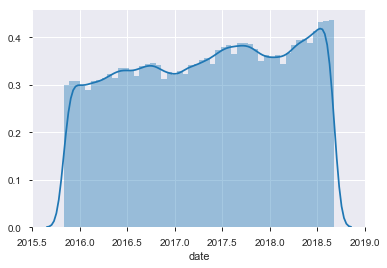

In [36]:
year = (full['date'] - datetime(2000, 1, 1)).dt.days / 365 + 2000
sns.distplot(year)

In [37]:
train['date'].min(), train['date'].max()

(Timestamp('2015-10-27 00:00:00'), Timestamp('2018-08-31 00:00:00'))

In [38]:
test['date'].min(), test['date'].max()

(Timestamp('2015-10-27 00:00:00'), Timestamp('2018-08-31 00:00:00'))

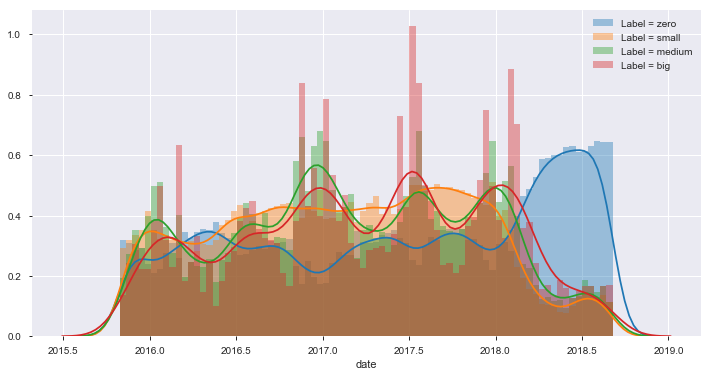

In [39]:
with change_figsize(12, 6):
    year = (train['date'] - datetime(2000, 1, 1)).dt.days / 365 + 2000
    label_distplots(year, y_binned, kde=True, hist=True, bins=80)

### Aircrafts

In [40]:
counts = train['aircraft'].value_counts()

In [41]:
counts

263    3528
125    3519
244    3509
124    3476
265    3465
       ... 
68       97
92       89
47       48
222      24
42        6
Name: aircraft, Length: 274, dtype: int64

<BarContainer object of 274 artists>

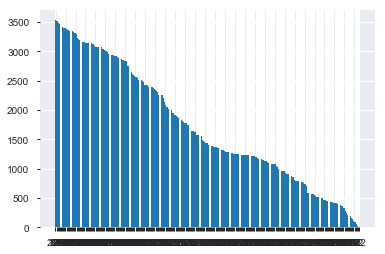

In [42]:
plt.bar(counts.index, counts.values)

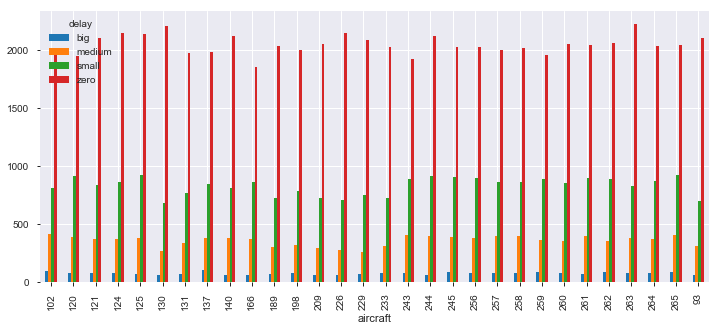

In [43]:
with change_figsize(12, 5):
    mask = train['aircraft'].isin(counts[:30].index)
    crosstab_by_mask(train, y_binned, 'aircraft', mask).plot(kind='bar')

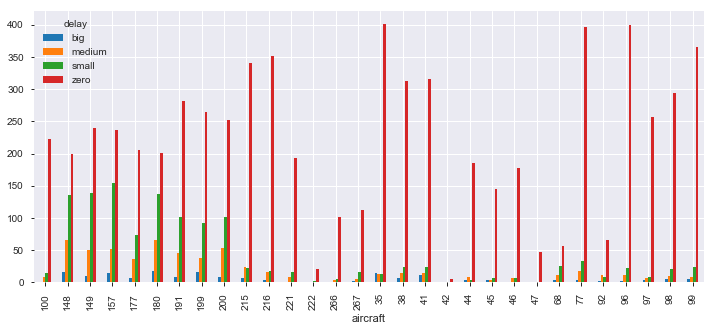

In [44]:
with change_figsize(12, 5):
    mask = train['aircraft'].isin(counts[-30:].index)
    crosstab_by_mask(train, y_binned, 'aircraft', mask).plot(kind='bar')

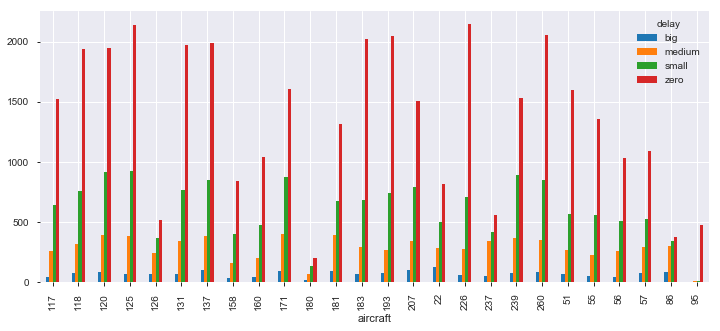

In [45]:
with change_figsize(12, 5):
    mask = train['aircraft'].isin(train.sample(n=30, random_state=2)['aircraft'].values)
    crosstab_by_mask(train, y_binned, 'aircraft', mask).plot(kind='bar')

### Flights

In [46]:
counts = train['flight'].value_counts()
counts

1006    847
998     811
1001    768
822     758
982     758
       ... 
1179      1
1255      1
815       1
1188      1
1100      1
Name: flight, Length: 1256, dtype: int64

In [47]:
plt.bar(counts.index, counts.values)

<BarContainer object of 1256 artists>

Error in callback <function flush_figures at 0x000002800CC23730> (for post_execute):


KeyboardInterrupt: 

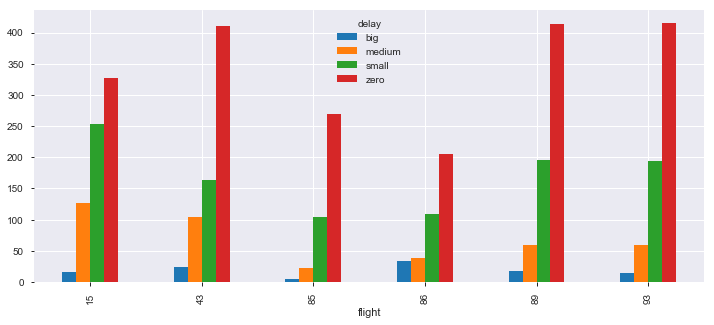

In [59]:
with change_figsize(12, 5):
    mask = train['flight'].isin(counts[:30].index)
    crosstab_by_mask(train, y_binned, 'flight', mask).plot(kind='bar')

### Delay codes

In [60]:
train['delay_code'].isnull().sum() / len(train)

0.5831097834457429

In [61]:
counts = train['delay_code'].value_counts()

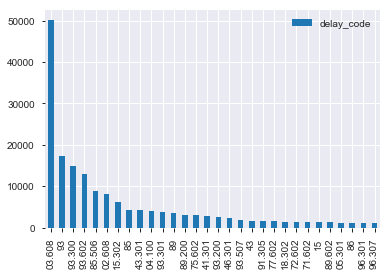

In [62]:
counts.to_frame().iloc[:30, :].plot(kind='bar')

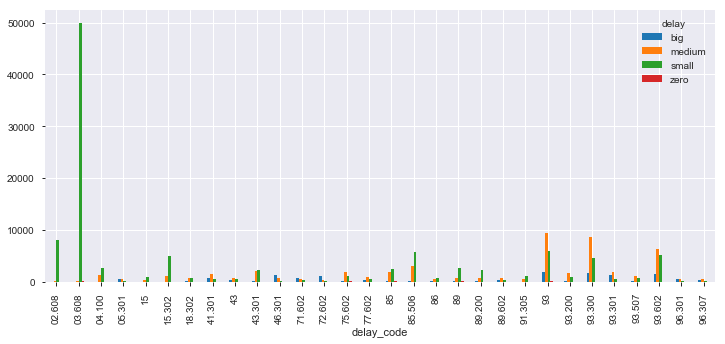

In [63]:
with change_figsize(12, 5):
    mask = train['delay_code'].isin(counts[:30].index)
    crosstab_by_mask(train, y_binned, 'delay_code', mask).plot(kind='bar')

In [64]:
delay_code_agg = train.groupby('delay_code')['delay'].agg(['mean', 'max', 'count'])

In [65]:
delay_code_agg.sort_values('max', ascending=False).head(10)

,mean,max,count
delay_code,,,
41,241.054705,1427.0,914
72.602,198.363767,1426.0,1391
51,237.092715,1411.0,151
93,31.632964,1387.0,17219
43,57.508971,1386.0,1672
93.602,35.293459,1386.0,12949
41.301,48.432018,1383.0,2736
51.200,325.666667,1372.0,9
64,289.058824,1361.0,85


In [66]:
delay_code_agg.sort_values('count', ascending=False).head(10)

,mean,max,count
delay_code,,,
03.608,1.831280,378.0,50071
93,31.632964,1387.0,17219
93.300,32.061897,1222.0,14831
93.602,35.293459,1386.0,12949
85.506,10.344165,420.0,8801
02.608,3.270310,41.0,8087
15.302,7.959382,277.0,6081
85,13.336529,555.0,4276
43.301,16.776217,1010.0,4272


### Flight time

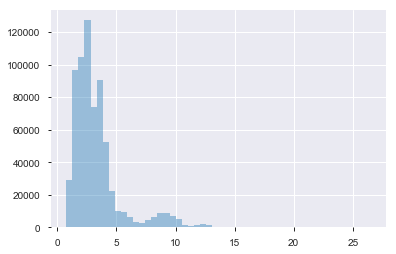

In [67]:
flight_time = (full['arrival_scheduled'] - full['departure_scheduled']).dt.total_seconds() / 3600
sns.distplot(flight_time, kde=False)

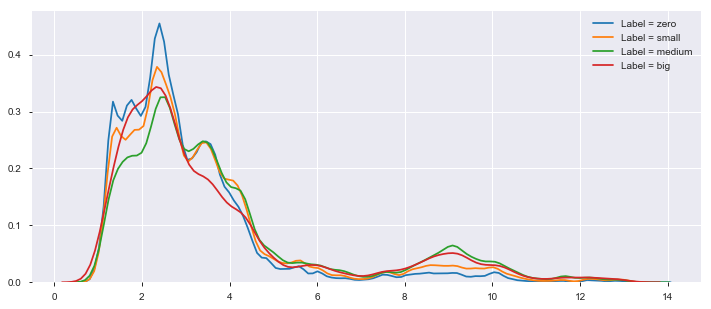

In [68]:
with change_figsize(12, 5):
    flight_time = (train['arrival_scheduled'] - train['departure_scheduled']).dt.total_seconds() / 3600
    label_distplots(flight_time, y_binned, hist=False)

# Build model

In [69]:
from scipy  import sparse

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, SCORERS, make_scorer


from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import shap
shap.initjs()

### Some helpful functions

#### Transform data

In [70]:
def label_encode(
    X: pd.DataFrame, 
    encoders: Optional[Dict[str, LabelEncoder]] = None,
    fit_only: bool = False,
) -> Tuple[pd.DataFrame, Dict[str, LabelEncoder]]:

    X = X.copy()
    encoders = encoders or {}
    for col in get_cat_features(X):
        if col not in encoders:
            encoder = LabelEncoder().fit(X[col])
            encoders[col] = encoder
        else:
            encoder = encoders[col]
        if not fit_only:
            X[col] = encoder.transform(X[col])
    return X, encoders


def one_hot_encode(
    X: pd.DataFrame, 
    encoders: Optional[Dict[str, OneHotEncoder]] = None,
    fit_only: bool = False,
) -> Tuple[sparse.csr_matrix, Dict[str, OneHotEncoder], List['str']]:
    cat_features = get_cat_features(X)
    feature_matrices = []
    encoders = encoders or {}
    columns = []
    for col in X.columns:
        if col in cat_features:
            if col not in encoders:
                encoder = OneHotEncoder().fit(X[[col]])
                encoders[col] = encoder
            else:
                encoder = encoders[col]
            if not fit_only:
                feature_matrix = encoder.transform(X[[col]])
            columns += [f'{col}::{val}' for val in encoder.categories_[0]]
        else:
            if not fit_only:
                feature_matrix = sparse.csr_matrix((
                    X[col].values, 
                    (
                        np.arange(X.shape[0], dtype=int), 
                        np.zeros(X.shape[0], dtype=int),
                    ),
                ))
            columns.append(col)
        if not fit_only:
            feature_matrices.append(feature_matrix)
    if not fit_only:
        features = sparse.hstack(feature_matrices, format='csr')
    else:
        features = X.copy()
    return features, encoders, columns


# def scale(
#     X: sparse.csr_matrix, 
#     scaler: Optional[StandardScaler] = None,
# ) -> Tuple[np.ndarray, StandardScaler]:
#     scaler = scaler or StandardScaler()
#     X_scaled = scaler.fit_transform(X.toarray())
#     return X_scaled, scaler

#### Represent results

In [71]:
def calc_metrics(
    y_true: Union[np.ndarray, pd.Series], 
    pred: Union[np.ndarray, pd.Series], 
) -> Dict[str, float]:
    res = {}
    res['mse'] = mean_squared_error(y_true, pred)
    res['mae'] = mean_absolute_error(y_true, pred)
    res['rmse'] = np.sqrt(mean_squared_error(y_true, pred))
    return res


def get_feature_importances(est, columns):
    return pd.DataFrame({
        'column': columns,
        'importance': est.feature_importances_,
    }).sort_values('importance', ascending=False)


def get_feature_coefficients(est, columns, sort_by_abs=True):
    coeffs = pd.DataFrame({
        'column': columns,
        'coef': est.coef_,
    })
    coeffs['coef_abs'] = coeffs['coef'].abs()
    if sort_by_abs:
        sort_column = 'coef_abs'
    else:
        sort_column = 'coef'
    return coeffs.sort_values(sort_column, ascending=False)


def represent_cv_results(gscv):
    cv_results = pd.DataFrame(gscv.cv_results_)
    res = cv_results[['params', 'mean_fit_time', 'mean_train_score', 'mean_test_score']] \
        .sort_values('mean_test_score', ascending=False)
    return res

#### Prepare features

In [72]:
def cut_not_popular_inplace(X, feature, n=None, frac=None, min_counts=None, default_value=''):       
    counts = X[feature].value_counts()
    if n is not None:
        valid_values = counts[:n].index
    elif frac is not None:
        n = int(frac * len(counts))
        valid_values = counts[:n].index
    elif min_counts is not None:
        valid_values = counts[counts.values >= min_counts].index
    else:
        raise ValueError()
    X.loc[~X[feature].isin(valid_values), feature] = default_value

## Extract features

In [73]:
MIN_DATE = full['date'].min()
MIN_DATE

Timestamp('2015-10-27 00:00:00')

In [74]:
def add_datetime_features(X):
    X = X.copy()
    
    X['days_from_min'] = (X['date'] - MIN_DATE).dt.days
    
    X['year'] = X['date'].dt.year
    X['month'] = X['date'].dt.month
    X['day'] = X['date'].dt.day
    X['dayofweek'] = X['date'].dt.dayofweek
    X['dayofyear'] = X['date'].dt.dayofyear
    X['hour'] = X['departure_scheduled'].dt.hour
    X['minute'] = X['departure_scheduled'].dt.minute
    
    return X


def add_holiday_feature(X):
    X = X.copy()
    
    holidays = pd.read_csv(pjoin(DATA_PATH, 'holidays.csv'))
    
    all_dates = pd.date_range('2016-01-01', '2016-12-31', freq='D')
    all_dates = pd.DataFrame({
        'month': all_dates.month, 
        'day': all_dates.day,
        'is_holiday': 1,
    })
    
    all_dates_holiday = pd.merge(
        all_dates,
        holidays,
        on=['month', 'day'],
        how='left',
    )
    all_dates_holiday['is_holiday'] = all_dates_holiday['is_holiday'].fillna(0)

    is_holiday = all_dates_holiday['is_holiday'].copy()
    for shift in [-3, -2, -1, 1, 2, 3]:
        all_dates_holiday['is_holiday'] += is_holiday.shift(shift, fill_value=0) / abs(shift)
    all_dates_holiday.iloc[-3:, -1] += np.array([1/3, 1/2, 1])  # simple hack
    
    X = pd.merge(
        X,
        all_dates_holiday,
        on=['month', 'day'],
    )
    
    return X

    
def add_places(X):
    codes = pd.read_csv(pjoin(DATA_PATH, 'airport_codes.csv'))
    codes.drop(columns=['city'], inplace=True)
    X = pd.merge(
        X,
        codes,
        left_on='from',
        right_on='code',
        how='left',
    )
    X = pd.merge(
        X,
        codes,
        left_on='to',
        right_on='code',
        how='left',
        suffixes=('_from', '_to')
    )
    X.drop(columns=['code_from', 'code_to', 'airport_from', 'airport_to'], inplace=True)
    
    for col in ['country_from', 'country_to']:
        X[col] = X[col].fillna('')
    
    return X

    
def add_weather(X):
    weather = pd.read_csv(pjoin(DATA_PATH, 'forecast_cleared.csv'), parse_dates=['date_time'])
    
    weather = weather.reindex(
        columns=[
            'airport',
            'date_time',
            'temperature',
            'relative_humidity',
            'wind_speed',
            'precipitation',
            'visibility',
            'snow_depth',
        ]        
    )
    X = pd.merge(
        X,
        weather,
        left_on=['from', 'date'],
        right_on=['airport', 'date_time'],
        how='left',
    )
    X.drop(columns=['airport', 'date_time'], inplace=True)
    X = pd.merge(
        X,
        weather,
        left_on=['to', 'date'],
        right_on=['airport', 'date_time'],
        how='left',
        suffixes=('_from', '_to'),
    )
    X.drop(columns=['airport', 'date_time'], inplace=True)
    
    for col in X.columns:
        if '_'.join(col.split('_')[:-1]) in weather.columns:
            X[col] = X[col].fillna(X[col].mean())
            
    return X
    
    
def add_info_from_last_flight(X: pd.DataFrame):
    X = X.sort_values(['aircraft', 'departure_scheduled'])
    
    last_flight_aircraft = X['aircraft'].shift(1)
    is_same_aircraft = last_flight_aircraft == X['aircraft']
    
    last_flight_arrival = X['arrival_scheduled'].shift(1, fill_value=pd.to_datetime(X['arrival_scheduled'].iat[0]))
    time_from_last_flight = (X['departure_scheduled'] - last_flight_arrival).dt.total_seconds() // 60
    time_from_last_flight[~is_same_aircraft] = time_from_last_flight.mean()
    X['time_from_last_flight'] = time_from_last_flight
    
    last_fligh_arrival_actual = X['arrival_actual'].shift(1, fill_value=pd.to_datetime(X['arrival_actual'].iat[0]))
    last_flight_delay = (last_fligh_arrival_actual - last_flight_arrival).dt.total_seconds() // 60
    last_flight_delay[~is_same_aircraft] = last_flight_delay.mean()
    X['last_flight_delay'] = last_flight_delay.fillna(last_flight_delay.mean())
    
    return X
    
    
def add_time_from_prev_svo_event(X: pd.DataFrame):
    X = X.copy()
    
    departure_from_svo = X.loc[X['from'] == 'SVO', 'departure_scheduled'].values
    arrival_to_svo = X.loc[X['to'] == 'SVO', 'arrival_scheduled'].values
    all_svo_events = np.concatenate((departure_from_svo, arrival_to_svo))
    all_svo_events.sort()
    
    from_svo_mask = X['from'] == 'SVO'
    
    current_time_idx = np.searchsorted(
        all_svo_events, 
        X.loc[from_svo_mask, 'departure_scheduled'].values, 
        side='left',
    )
    prev_time_idx = np.maximum(current_time_idx - 1, 0)
    prev_time = all_svo_events[prev_time_idx]
    
    X['time_from_prev_svo_event'] = -1
    X.loc[from_svo_mask, 'time_from_prev_svo_event'] = (
        X.loc[from_svo_mask, 'departure_scheduled'] - 
        prev_time
    ).dt.total_seconds() // 60
    
    return X


def add_cat_features_statistics(X):
    X = X.copy()
    
    cat_features = ['from', 'to', 'aircraft', 'flight']
    
    for feature in cat_features:
        for agg_fun in ['mean']:
            agg_values = X.groupby(by=feature)['delay'].transform(agg_fun)
            X[f'{feature}_{agg_fun}_delay'] = agg_values.fillna(agg_values.mean())
        
    return X
    
    
def extract_features(df: pd.DataFrame):
    X = df.copy()

    X = add_datetime_features(X)

    X = add_holiday_feature(X)

    X['flight_time'] = (X['arrival_scheduled'] - X['departure_scheduled']).dt.total_seconds() // 3600

    X = add_places(X)
    X['is_domestic'] = (X['country_from'] == X['country_to']).astype(int)
    X.drop(columns=['country_from', 'country_to'], inplace=True)
     
    X = add_weather(X)

    X = add_info_from_last_flight(X)
    X['is_time_from_last_flight_less_than_30'] = (X['time_from_last_flight'] < 30).astype(int)
    X['is_time_from_last_flight_less_than_60'] = (X['time_from_last_flight'] < 60).astype(int)
    X['is_time_from_last_flight_less_than_90'] = (X['time_from_last_flight'] < 90).astype(int)
    X['time_from_last_flight_actual'] = X['time_from_last_flight'] - X['last_flight_delay']
    X.drop(columns=['time_from_last_flight'], inplace=True)
    
    X = add_time_from_prev_svo_event(X)
    
    cut_not_popular_inplace(X, 'flight', min_counts=30)
    cut_not_popular_inplace(X, 'aircraft', min_counts=100)
    cut_not_popular_inplace(X, 'from', min_counts=20)
    cut_not_popular_inplace(X, 'to', min_counts=20)
    X = add_cat_features_statistics(X)
    X.drop(columns=['aircraft', 'from', 'to', 'flight'], inplace=True)
    

    X.drop(columns=['date', 'departure_scheduled', 'arrival_scheduled'], inplace=True)
    X.drop(columns=['departure_actual', 'arrival_actual', 'delay_code'], inplace=True)
    
    return X

In [75]:
%%time
full_features = extract_features(full)
print(full_features.shape)

(675330, 35)
Wall time: 16.6 s


In [76]:
get_df_memory_usage_in_mb(full_features)

175

In [77]:
get_cat_features(full_features)

[]

In [78]:
%%time
is_train = full_features['delay'].notnull()

X_train = full_features.loc[is_train]
y_train = X_train['delay']
X_train.drop(columns=['id', 'delay'], inplace=True)

X_test = full_features.loc[~is_train]
X_test_id = X_test['id']
X_test.drop(columns=['id', 'delay'], inplace=True)

print('Size: ', get_df_memory_usage_in_mb(X_train) + get_df_memory_usage_in_mb(X_test))

C:\Users\emiliy.feldman\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Size:  164
Wall time: 519 ms


In [79]:
%%time
_, label_encoders = label_encode(full_features, fit_only=True)
X_train_le, _ = label_encode(X_train, label_encoders)
X_test_le, _ = label_encode(X_test, label_encoders)
print('Size: ', get_df_memory_usage_in_mb(X_train_le) + get_df_memory_usage_in_mb(X_test_le))

Size:  164
Wall time: 184 ms


In [80]:
%%time
_, one_hot_encoders, _ = one_hot_encode(full_features, fit_only=True)
X_train_ohe, _, ohe_columns = one_hot_encode(X_train, one_hot_encoders)
X_test_ohe, _, _ = one_hot_encode(X_test, one_hot_encoders)
print('Train shape: ', X_train_ohe.shape)
print('Test shape: ', X_test_ohe.shape)
print('Size: ', get_csr_memory_usage_in_mb(X_train_ohe) + get_csr_memory_usage_in_mb(X_test_ohe))

Train shape:  (472676, 33)
Test shape:  (202654, 33)
Size:  257
Wall time: 3.76 s


## Make scorer

In [81]:
def rmse_score(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def custom_score(y, y_pred):
    y_pred = y_pred.copy()
    y_pred[y_pred < 0] = 0
    return rmse_score(y, y_pred)

custom_scorer = make_scorer(custom_score, greater_is_better=False)

## Try different models

### Linear regression

In [73]:
lr = LinearRegression()
gscv_lr = GridSearchCV(
    estimator=lr,
    param_grid={'normalize': [True, False]},
    scoring=custom_scorer,
    n_jobs=2,
    cv=StratifiedKFold(n_splits=2, random_state=1),
    refit=True,
    return_train_score=True,
    verbose=True,
)

gscv_lr.fit(X_train_ohe, y_train);

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\emiliy.feldman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   17.1s finished


In [74]:
represent_cv_results(gscv_lr)

,params,mean_fit_time,mean_train_score,mean_test_score
0,{'normalize': True},2.170696,-36.208854,-37.302551
1,{'normalize': False},3.151075,-36.545562,-37.628923


### Ridge

In [75]:
rg = Ridge(random_state=1, max_iter=200)
gscv_rg = GridSearchCV(
    estimator=rg,
    param_grid={'alpha': [1]},
    scoring=custom_scorer,
    n_jobs=2,
    cv=StratifiedKFold(n_splits=2, random_state=1),
    refit=True,
    return_train_score=True,
    verbose=True,
)

gscv_rg.fit(X_train_ohe, y_train);

Fitting 2 folds for each of 1 candidates, totalling 2 fits


C:\Users\emiliy.feldman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   40.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   40.4s finished
C:\Users\emiliy.feldman\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [76]:
represent_cv_results(gscv_rg)

,params,mean_fit_time,mean_train_score,mean_test_score
0,{'alpha': 1},38.525506,-42.306771,-42.271096


In [77]:
rg_reg = gscv_rg.best_estimator_

In [86]:
get_feature_coefficients(rg_reg, ohe_columns).head(20)

,column,coef,coef_abs
23,last_flight_delay,0.034441,0.034441
32,flight_mean_delay,0.031801,0.031801
0,days_from_min,-0.003751,0.003751
17,temperature_to,-0.002986,0.002986
11,temperature_from,-0.002248,0.002248
18,relative_humidity_to,0.002075,0.002075
12,relative_humidity_from,0.001404,0.001404
31,aircraft_mean_delay,0.001350,0.001350
29,from_mean_delay,0.001211,0.001211
30,to_mean_delay,0.000917,0.000917


### Decision tree

In [87]:
dt = DecisionTreeRegressor(
    max_leaf_nodes=100, 
    random_state=1,
    max_features=None,
    min_impurity_decrease=0.01
)
gscv_dt = GridSearchCV(
    estimator=dt,
    param_grid={'max_depth': [7], 'min_samples_leaf': [500], 'min_samples_split': [500]},
    scoring=custom_scorer,
    n_jobs=2,
    cv=StratifiedKFold(n_splits=2, random_state=1),
    refit=True,
    return_train_score=True,
    verbose=True,
)

gscv_dt.fit(X_train_le, y_train);

Fitting 2 folds for each of 1 candidates, totalling 2 fits


C:\Users\emiliy.feldman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.6s finished


In [88]:
represent_cv_results(gscv_dt)

,params,mean_fit_time,mean_train_score,mean_test_score
0,"{'max_depth': 7, 'min_samples_leaf': 500, 'min...",2.324782,-36.355856,-37.85121


In [89]:
dt_reg = gscv_dt.best_estimator_

In [90]:
get_feature_importances(dt_reg, X_train_le.columns)

,column,importance
32,flight_mean_delay,0.488592
27,time_from_last_flight_actual,0.425014
23,last_flight_delay,0.072545
24,is_time_from_last_flight_less_than_30,0.007148
0,days_from_min,0.004246
28,time_from_prev_svo_event,0.001010
3,day,0.000848
11,temperature_from,0.000598
5,dayofyear,0.000000
20,precipitation_to,0.000000


In [91]:
tree = dt_reg.tree_
thr = pd.DataFrame({'feat': tree.feature, 'thr': tree.threshold})
thr.query('feat != -2', inplace=True)
thr.insert(1, 'col', X_train_le.columns[thr['feat']])
thr

,feat,col,thr
0,32,flight_mean_delay,221.976475
1,27,time_from_last_flight_actual,-2.500000
3,23,last_flight_delay,203.500000
4,27,time_from_last_flight_actual,31.832732
5,27,time_from_last_flight_actual,-44.500000
6,32,flight_mean_delay,12.545718
7,24,is_time_from_last_flight_less_than_30,0.500000
8,32,flight_mean_delay,12.946393
11,27,time_from_last_flight_actual,51.832731
12,32,flight_mean_delay,73.069296


### Gradient boosting

In [106]:
cb = CatBoostRegressor(
    cat_features=get_cat_features(X_train),
    eval_metric='RMSE',
    random_seed=2,
    nan_mode='Forbidden',
    task_type='GPU',
    verbose=False,
)


gscv_cb = GridSearchCV(
    estimator=cb,
    param_grid={
        'n_estimators': [50, 100], 
        'max_depth': [3, 4, 5],
        
    },
    scoring=custom_scorer,
    n_jobs=1,
    cv=StratifiedKFold(n_splits=2, random_state=1),
    refit=True,
    return_train_score=True,
    verbose=True,

)

gscv_cb.fit(X_train_le, y_train);

Fitting 2 folds for each of 6 candidates, totalling 12 fits


C:\Users\emiliy.feldman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   23.1s finished


In [107]:
represent_cv_results(gscv_cb)

,params,mean_fit_time,mean_train_score,mean_test_score
5,"{'max_depth': 5, 'n_estimators': 100}",2.243597,-34.117821,-36.334388
3,"{'max_depth': 4, 'n_estimators': 100}",2.039059,-34.707019,-36.558616
1,"{'max_depth': 3, 'n_estimators': 100}",1.863255,-35.493955,-36.957271
4,"{'max_depth': 5, 'n_estimators': 50}",1.590085,-35.560864,-37.157084
2,"{'max_depth': 4, 'n_estimators': 50}",1.500741,-36.137570,-37.377842
0,"{'max_depth': 3, 'n_estimators': 50}",1.801962,-36.849768,-37.728744


In [109]:
cb_reg = gscv_cb.best_estimator_
get_feature_importances(cb_reg, X_train_le.columns)

,column,importance
27,time_from_last_flight_actual,31.382959
32,flight_mean_delay,28.147064
23,last_flight_delay,10.922169
29,from_mean_delay,9.349739
24,is_time_from_last_flight_less_than_30,5.115676
6,hour,2.992836
30,to_mean_delay,2.978857
28,time_from_prev_svo_event,2.257311
31,aircraft_mean_delay,2.233364
7,minute,1.117567


In [188]:
pred_test = cb_reg.predict(X_test_le)
res = pd.DataFrame({
    'id': X_test_id.astype(int),
    'Задержка отправления в минутах': pred_test,
}).sort_values('id')
res.to_csv('res_catboost_5_100.csv', index=False)

In [110]:
pred = cb_reg.predict(X_train_le)

In [111]:
custom_score(y_train, pred)

35.23211230688546

In [112]:
pd.set_option('display.max_columns', 100)

In [114]:
compare = pd.DataFrame({'true': y_train, 'pred': pred, 'diff': y_train - pred})
compare.head()

,true,pred,diff
670529,96.0,131.360267,-35.360267
371086,3.0,10.874500,-7.874500
370879,0.0,7.619170,-7.619170
370336,5.0,9.282681,-4.282681
218990,0.0,6.912585,-6.912585


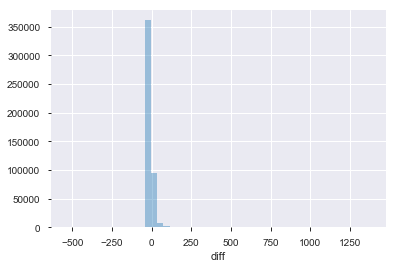

In [115]:
sns.distplot(compare['diff'], kde=False)

In [116]:
bad_pred = compare[compare['diff'].abs() > 200]
bad_pred.shape

(2025, 3)

In [117]:
bad_pred.head()

,true,pred,diff
308886,353.0,8.335829,344.664171
397231,1145.0,193.157533,951.842467
51871,1069.0,178.716422,890.283578
270814,0.0,216.944221,-216.944221
53467,243.0,12.465294,230.534706


In [118]:
i = 308886
row = X_train.loc[i:i, :]
row

,days_from_min,year,month,day,dayofweek,dayofyear,hour,minute,is_holiday,flight_time,is_domestic,temperature_from,relative_humidity_from,wind_speed_from,precipitation_from,visibility_from,snow_depth_from,temperature_to,relative_humidity_to,wind_speed_to,precipitation_to,visibility_to,snow_depth_to,last_flight_delay,is_time_from_last_flight_less_than_30,is_time_from_last_flight_less_than_60,is_time_from_last_flight_less_than_90,time_from_last_flight_actual,time_from_prev_svo_event,from_mean_delay,to_mean_delay,aircraft_mean_delay,flight_mean_delay
308886,117,2016,2,21,6,52,1,35,4.666667,2.0,1,26.7,88.37,20.1,0.4,3.6,7.9,22.3,80.28,17.9,0.0,6.5,22.0,17.0,0,0,0,423.0,10.0,8.182588,8.93647,24.079365,7.970105


In [119]:
train[train['departure_scheduled'] == datetime(row['year'], row['month'], row['day'], row['hour'], row['minute'])]

,date,flight,from,to,aircraft,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual,delay_code,delay
226247,2016-02-21,1013,BRU,SVO,230,2016-02-21 01:35:00,2016-02-21 01:22:00,2016-02-21 04:50:00,2016-02-21 04:29:00,NaN,0.0
322618,2016-02-21,921,BUD,SVO,125,2016-02-21 01:35:00,2016-02-21 01:22:00,2016-02-21 04:00:00,2016-02-21 03:47:00,NaN,0.0
373334,2016-02-21,151,SVO,PEE,0,2016-02-21 01:35:00,2016-02-21 07:28:00,2016-02-21 03:35:00,2016-02-21 09:27:00,72.602,353.0


#### Get model explanation by shap

In [120]:
sample = X_train_le.sample(n=20000)

cb_explainer = shap.TreeExplainer(cb_reg)
cb_shap_values = cb_explainer.shap_values(sample)

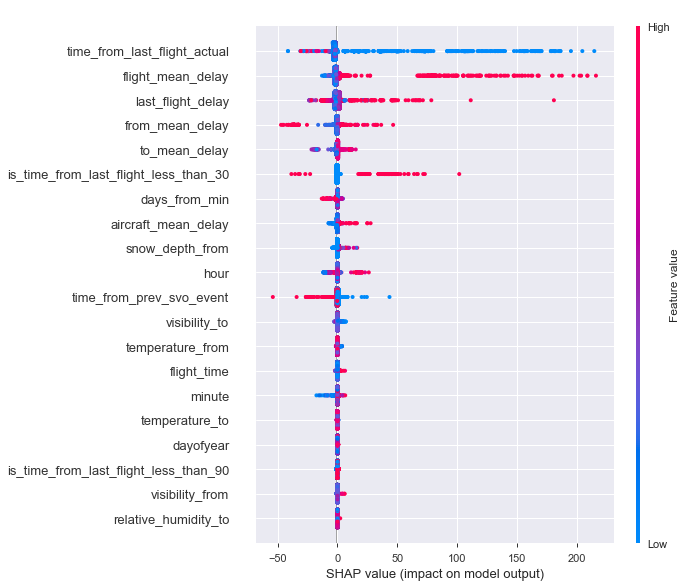

In [121]:
# See feature impacts

shap.summary_plot(cb_shap_values, sample)

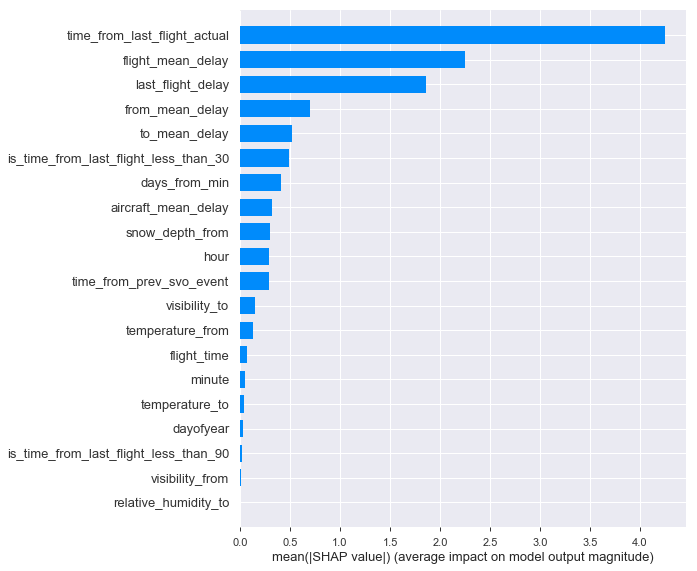

In [122]:
# See mean feature importances

shap.summary_plot(cb_shap_values, sample, plot_type="bar")

### Random forest

In [82]:
rf = LGBMRegressor(
    boosting='rf',
    num_leaves=50,
    learning_rate=0.1,
    random_state=1,
    n_jobs=-3,
    metric="rmse",
    bagging_freq=1,
    bagging_fraction=0.5,
)
gscv_rf = GridSearchCV(
    estimator=rf,
    param_grid={'max_depth': [6], 'n_estimators': [500]},
    scoring=custom_scorer,
    n_jobs=1,
    cv=StratifiedKFold(n_splits=2, random_state=1),
    refit=True,
    return_train_score=True,
    verbose=True,
)


gscv_rf.fit(X_train_le, y_train);

Fitting 2 folds for each of 1 candidates, totalling 2 fits


C:\Users\emiliy.feldman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.1s finished
C:\Users\emiliy.feldman\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [83]:
represent_cv_results(gscv_rf)

,params,mean_fit_time,mean_train_score,mean_test_score
0,"{'max_depth': 6, 'n_estimators': 500}",7.204451,-32.352835,-34.615406


In [84]:
rf_reg = gscv_rf.best_estimator_

In [85]:
get_feature_importances(rf_reg, X_train_le.columns)

,column,importance
23,last_flight_delay,3976
32,flight_mean_delay,2996
27,time_from_last_flight_actual,2869
6,hour,1372
28,time_from_prev_svo_event,916
0,days_from_min,868
24,is_time_from_last_flight_less_than_30,825
29,from_mean_delay,732
31,aircraft_mean_delay,646
21,visibility_to,484


In [86]:
pred_test = rf_reg.predict(X_test_le)
res = pd.DataFrame({
    'id': X_test_id.astype(int),
    'Задержка отправления в минутах': pred_test,
}).sort_values('id')
res.to_csv('res_lgbm_rf_6_500.csv', index=False)

#### Explain features

In [100]:
sample = X_train_le.sample(n=20000)
rf_explainer = shap.TreeExplainer(rf_reg)
rf_shap_values = rf_explainer.shap_values(sample)

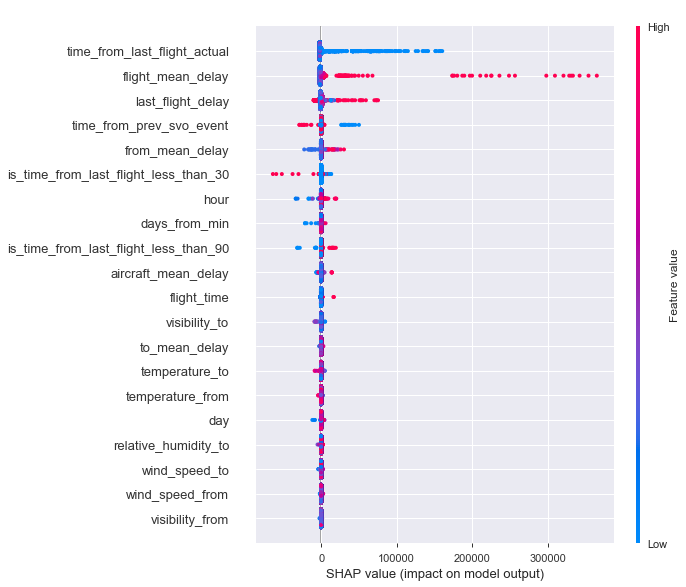

In [102]:
shap.summary_plot(rf_shap_values, sample)

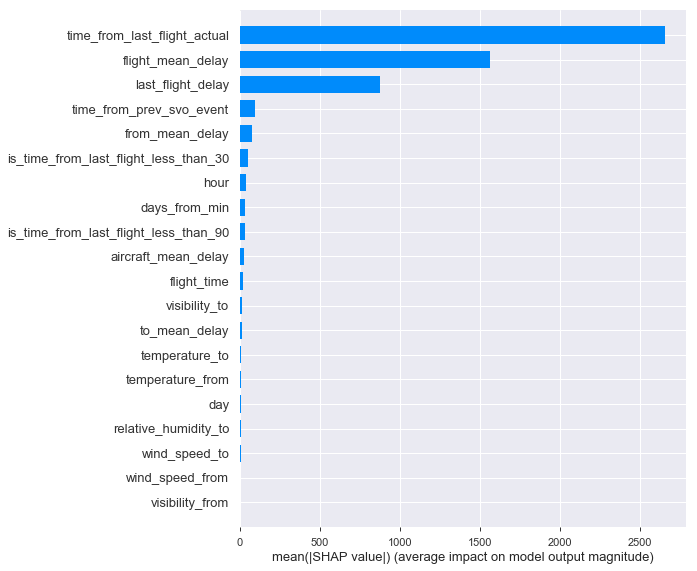

In [103]:
shap.summary_plot(rf_shap_values, sample, plot_type='bar')